In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pickle

from LatexConstants import *
from scipy.optimize import curve_fit
from scipy.stats import norm

In [8]:
def asymgaus(x, N, mu, sigma, a, b):
    return N*np.exp(-(x-mu)**2/(2*sigma**2)) + a*x + b

def bigaus(x, mu, sigma, N, mu1, sigma1, N1):
    return N*np.exp(-(x-mu)**2/(2*sigma**2)) + N1*np.exp(-(x-mu1)**2/(2*sigma1**2)) 

def line(x, m, q):
    return m*x+q

def gaussian(x, N, mu, sigma):
    return N*np.exp(-(x-mu)**2/(2*sigma**2))

In [38]:
output_dir = '../ThesisPlots/FinalPlots/'
with open("../reco_25stripmin/histos/2124/ThetaP2_M01.pkl", "rb") as file:
    res = pickle.load(file)

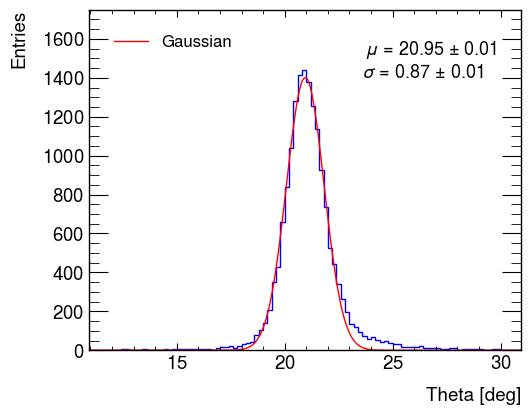

In [39]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
n, bins, patches = plt.hist(res, bins = 150, range = (10,40), histtype='step', color = 'blue')
w = bins[1]-bins[0]
a = bins[0]
b = bins[-2]
x = bins[0:-1] + 0.5*w
# plt.scatter(x,n, marker='.')
# par, cov = curve_fit(gaussian, x, n, p0 = [1,1,1,1,1,1, 0.1, 0.11])
# par, cov = curve_fit(gaussian, x, n, p0 = (22, 1 , 3000))
par, cov = curve_fit(gaussian, x, n, p0 = (1400, 22, 1))
x = np.linspace(0,40, 1000)

plt.plot(x, gaussian(x, *par), color = 'red', lw = 1, label = 'Gaussian')
# plt.plot(x, gaussian(x, *par[0:3]), color = 'royalblue', lw = 1, label = 'Gauss')
# plt.plot(x, line(x, *par[3:]), color = 'darkorange', lw = 1, label = 'Line')
# plt.plot(x, line(x, *par[6:]), color = 'darkorange', lw = 1)
# plt.plot(x, gaussian(x, 22 , 1, 3000), color = 'red', lw = 1)
xtext = par[1]*(1+0.12)
ytext = par[0]
sep = 120
plt.annotate(text = r' $\mu$'+f' = {par[1]:.2f} $\pm$ {np.sqrt(cov[1][1]):.2f}', xy = (xtext, ytext+sep), fontsize = 13)
plt.annotate(text = r'$\sigma$'+f' = {abs(par[2]):.2f} $\pm$ {np.sqrt(cov[2][2]):.2f}', xy = (xtext+0.1, ytext), fontsize = 13)
plt.xlabel('Theta [deg]', fontsize = 0.9*15)
plt.ylabel('Entries', fontsize = 0.9*15)
plt.xlim(par[1]-10,par[1]+10)
plt.tick_params(labelsize = 0.9*15)
# plt.ylim(0, 1000)
# plt.yscale('log')
plt.legend(loc = 'upper left',fontsize = 0.8*15)
plt.savefig(f'{output_dir}Theta2124_timefit.png', dpi = 600)
plt.savefig(f'{output_dir}Theta2124_timefit.pdf', dpi = 600)
plt.show()

In [28]:
par[1]

20.953730809526572